In [20]:
import monai
from monai.transforms import Resize
from monai.data.image_reader import nib
from monai.transforms import Compose, LoadImaged, Spacingd

In [28]:
# 读取数据元信息

data = nib.load("../demo_data2/imagesTr/case_00000_0000.nii.gz")
# 查看体素间距
print(data.header.get_zooms())  # (0.5, 0.9199219, 0.9199219)

(0.5, 0.9199219, 0.9199219)


In [33]:

from monai.transforms import EnsureChannelFirstd

data = [{
    "image": "../demo_data2/imagesTr/case_00000_0000.nii.gz",  # CT图像的路径
    "label": "../demo_data2/labelsTr/case_00000.nii.gz"  # 标签图像的路径
}]

transforms = Compose([
        LoadImaged(keys=["image", "label"]),  # 加载图像和标签
        EnsureChannelFirstd(keys=["image", "label"]),  # 将图像和标签的通道维度放在第一维
        # Spacingd(keys=["image", "label"],  # 对图像和标签进行插值
        #          pixdim=(1.5, 1.5, 2.0),  # 设置插值后的体素间距
        #          mode=("bilinear", "nearest")),  # 设置插值模式
    ])
# 展示transformed_data 和 原图像
image = transforms(data[0])["image"]
label = transforms(data[0])["label"]



In [34]:
image.shape

torch.Size([1, 611, 512, 512])

In [60]:
data = [{
    "image": "../demo_data2/imagesTr/case_00000_0000.nii.gz",  # CT图像的路径
    "label": "../demo_data2/labelsTr/case_00000.nii.gz"  # 标签图像的路径
}]

transforms = Compose([
        LoadImaged(keys=["image", "label"]),  # 加载图像和标签
        EnsureChannelFirstd(keys=["image", "label"]),  # 将图像和标签的通道维度放在第一维
        Spacingd(keys=["image", "label"],  # 对图像和标签进行插值
                 pixdim=(0.5, 5, 5),  # 设置插值后的体素间距
                 mode=("bilinear", "nearest")),  # 设置插值模式
    ])
transformed_data = transforms(data[0])
# 展示transformed_data 和 原图像
image_downSampling = transformed_data["image"]
label_downSampling = transformed_data["label"]

In [61]:
image_downSampling.shape

torch.Size([1, 611, 95, 95])

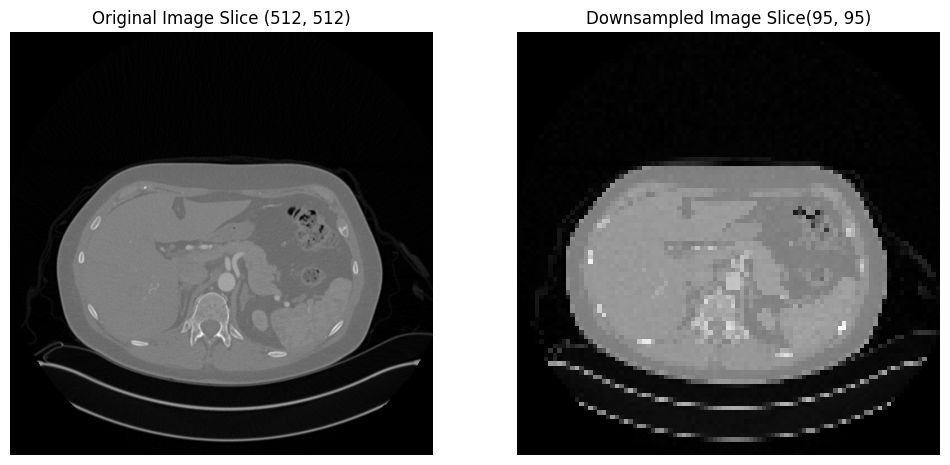

In [63]:
from matplotlib import pyplot as plt


slice_idx = 100# 取z轴的100index切片
slice_image = (image[0, slice_idx, :, :]).cpu().numpy()

# # 取下采样后对应的slice_idx的切片
# original_index = 100  # 原始图像的索引
# original_spacing = 1.0  # 原始图像的z轴体素间距（以mm为单位，示例值）
# new_spacing = 2.0  # 重采样后图像的z轴体素间距（以mm为单位，示例值）
# # 计算重采样后的图像中相同物理位置的索引
# new_index = int(original_index * (original_spacing / new_spacing))

slice_downSampling_img = (image_downSampling[0, slice_idx, :, :]).cpu().numpy()
# 创建图形和子图
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 显示原始图像的切片
axes[0].imshow(slice_image, cmap='gray')
axes[0].set_title('Original Image Slice '+str(slice_image.shape))
axes[0].axis('off')  # 关闭坐标轴显示


# 显示下采样后图像的切片
axes[1].imshow(slice_downSampling_img, cmap='gray')
axes[1].set_title('Downsampled Image Slice' + str(slice_downSampling_img.shape))
axes[1].axis('off')  # 关闭坐标轴显示

# 展示图像
plt.show()

# 可视化

torch.Size([1, 512, 512, 611])


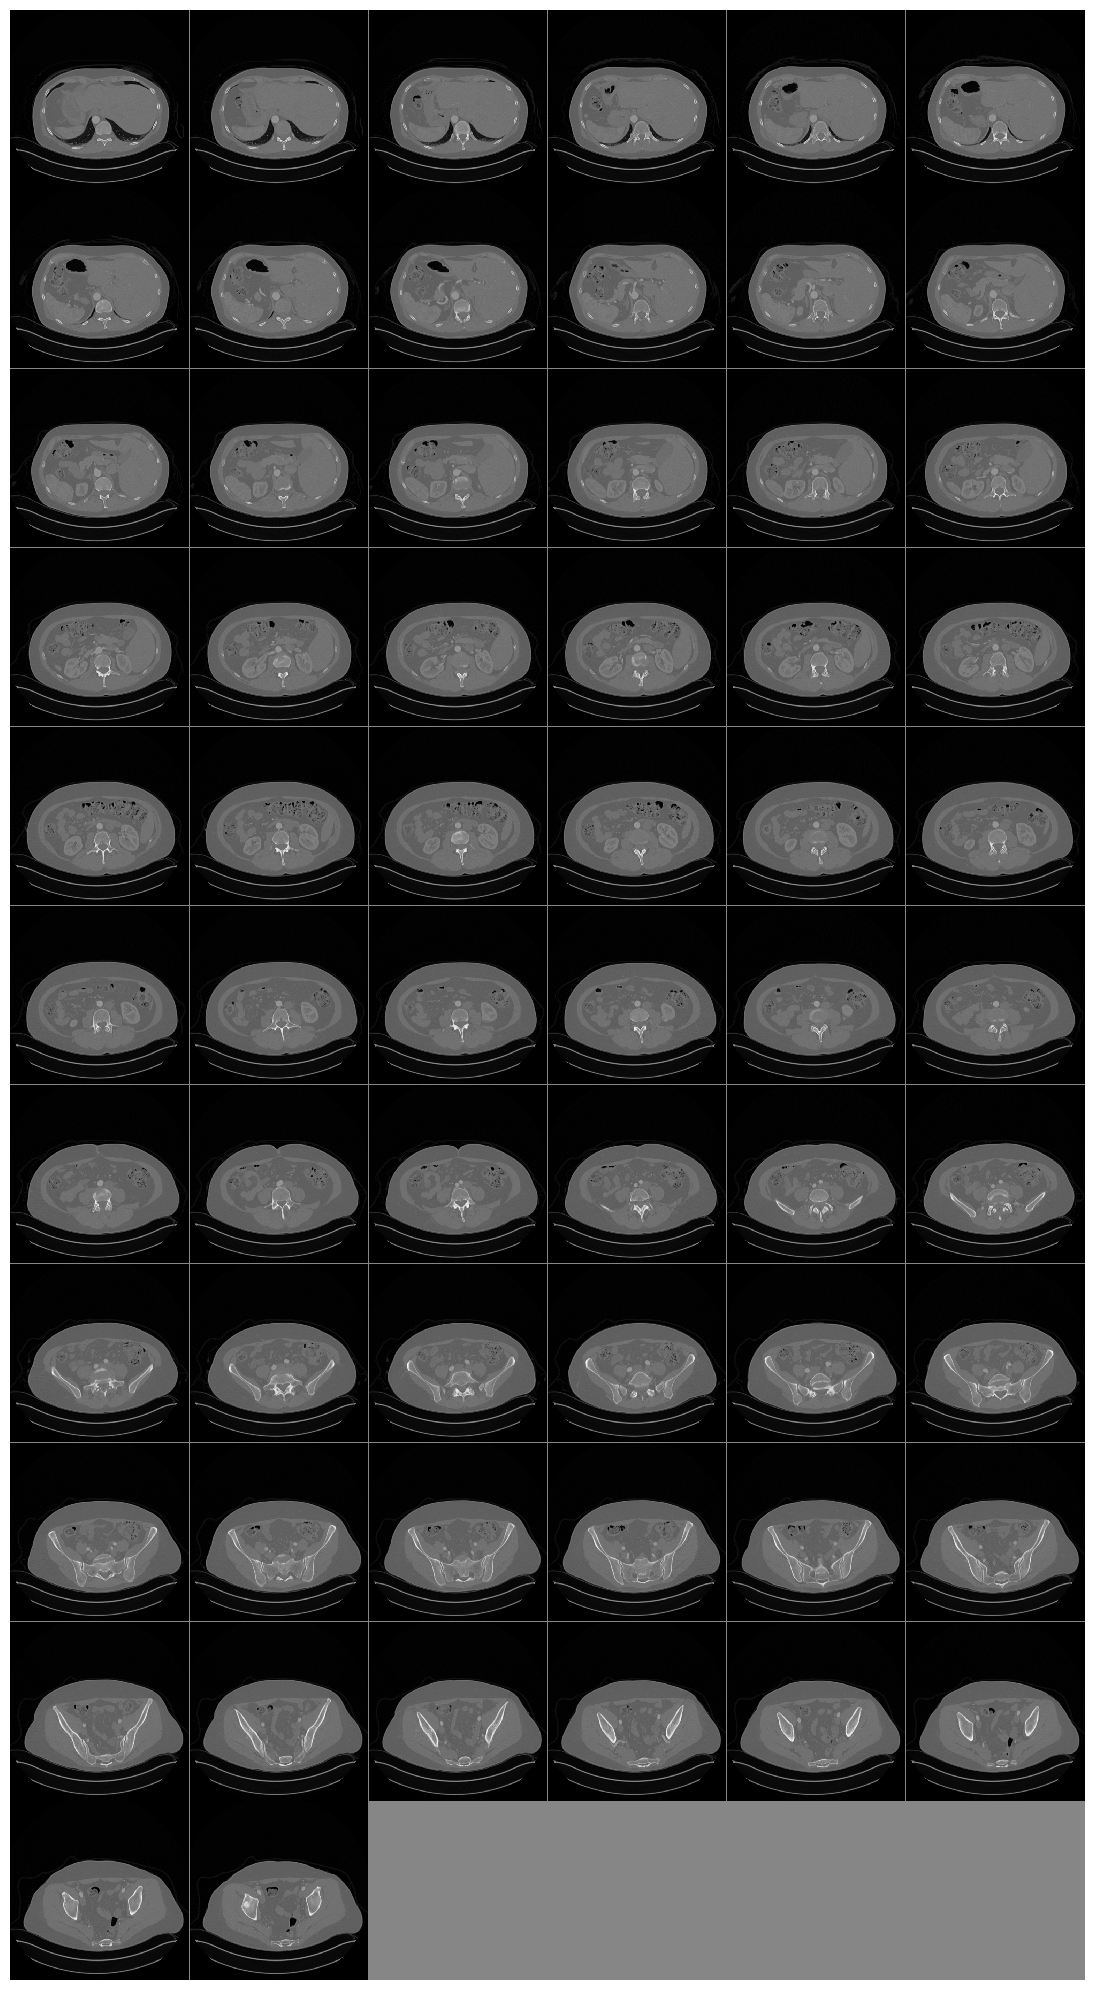

In [45]:
from monai.visualize import matshow3d
from monai.transforms import EnsureTyped, Orientationd, Rotate90d

# 定义数据路径
data = [{
    "image": "../demo_data2/imagesTr/case_00000_0000.nii.gz",  # CT图像的路径
    "label": "../demo_data2/labelsTr/case_00000.nii.gz"  # 标签图像的路径
}]

# 定义变换管道
transforms = Compose([
    LoadImaged(keys=["image", "label"]),  # 加载图像和标签
    EnsureChannelFirstd(keys=["image", "label"]),  # 将图像和标签的通道维度放在第一维
    Orientationd(keys=["image", "label"], axcodes="LPI"),  # 调整图像和标签的方向
    Rotate90d(keys=["image", "label"], k=3, spatial_axes=(0, 1)), # 对图像和标签顺时针旋转90度
    EnsureTyped(keys=["image", "label"])  # 确保数据类型正确
])

# 应用变换管道
transformed = transforms(data[0])
print(transformed["image"].shape)  
# 使用 matshow3d 可视化图像
fig = matshow3d(
    volume=transformed["image"],  # 提供已经变换过的图像
    figsize=(20, 20),  # 设置图像大小
    frames_per_row=6,  # 每行显示6个切片
    frame_dim=-1,  # 定义用于可视化切片的维度
    channel_dim=0,  # 单通道图像，通常为0
    every_n=10,  # 每隔5个切片显示一个
    # vmin=-300, vmax=600,
    cmap="gray",  # 灰度颜色映射
    fill_value=255  # 填充值
)